# **Exploratory Data Analysis (EDA)**

## **Objective**
The purpose of this notebook is to explore the dataset, identify patterns, and gain insights into sentiment distribution for tweets about Apple and Google products. This exploration will help guide data preprocessing and model-building decisions for sentiment classification.

## **Dataset Overview**
The dataset contains over 9,000 tweets with the following key columns:
- `tweet_text`: The content of the tweet.
- `emotion_in_tweet_is_directed_at`: The specific product/brand the tweet is directed at (e.g., Apple, Google, iPad).
- `is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment of the tweet (positive, negative, no emotion, or unclear).

Key observations from the raw data:
- Many tweets have missing values in `emotion_in_tweet_is_directed_at`.
- Sentiments are distributed across `positive`, `negative`, and `no emotion`, with a class imbalance favoring positive sentiment.
- Tweets reference multiple brands, with "Apple" and "iPad" being dominant.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/raw/Brands and Product Emotions.csv"
df = pd.read_csv(data_path, encoding='latin1')

df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

## **Exploratory Insights**
1. **Sentiment Distribution Across Brands:**  
   - Positive sentiment is overwhelmingly dominant across brands, creating a clear class imbalance.
   - Negative sentiment is present but underrepresented, highlighting the need to address this imbalance during modeling.

2. **Brand Mentions:**  
   - "Apple" (including "iPad") and "Google" are the most mentioned brands, indicating significant public discourse about these products.
   - Lesser mentions of other brands (e.g., "Android App") suggest these might be combined or excluded for focused analysis.

3. **Text Length Analysis:**  
   - Tweet lengths are fairly consistent, with most tweets under 200 characters. This indicates no drastic outliers that would skew preprocessing steps.

## **Challenges Identified**
- **Class Imbalance:**  
   Positive sentiment significantly outweighs negative and neutral classes. This imbalance could affect model performance, particularly in identifying negative sentiment.
- **Brand Granularity:**  
   Some categories (e.g., "Apple" vs. "iPad") overlap heavily, necessitating consolidation for cleaner modeling.

In [5]:
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
sentiment_counts

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

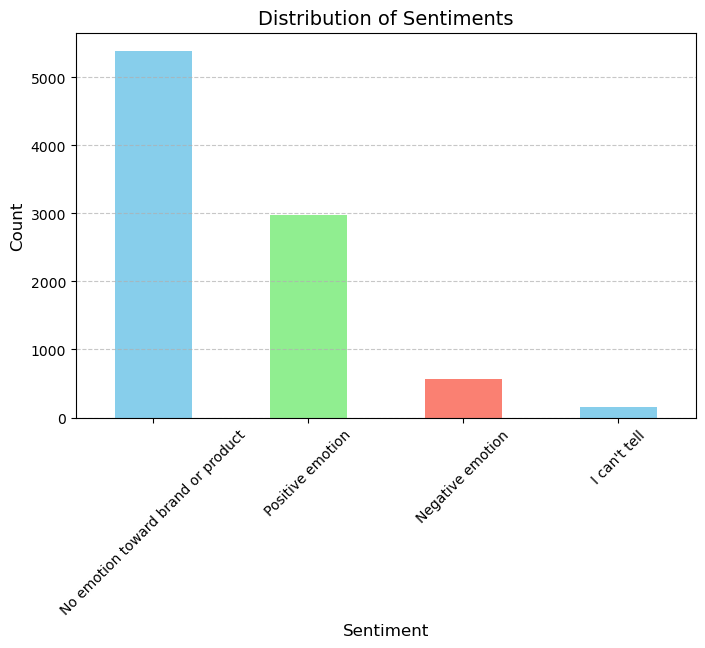

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Distribution of Sentiments", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
tweet_sample = df['tweet_text'].sample(10, random_state=42)

In [8]:
df['tweet_length'] = df['tweet_text'].str.len()
tweet_length_summary = df['tweet_length'].describe()

In [9]:
brand_counts = df['emotion_in_tweet_is_directed_at'].value_counts()

In [10]:
tweet_sample, tweet_length_summary, brand_counts.head()

(5558    RT @mention best thing abt @mention for #SXSW?...
 8350    Gary is starting a new show &quot;Daily Grape&...
 2303    The walk by Lady Bird Lake was lovely, but Goo...
 927     C34: ItÛªs Not a Retreat! {link} [codes valid...
 1963    Holler Gram for iPad on the iTunes App Store: ...
 1672    I asked, &quot;Why should(n't) I get an iPad 2...
 4475    LOL, I don't see a single PC user around meÛÓ...
 4262    Video: Tim Wu explains to me #netneutrality, i...
 8216    Rockin out at the Party Lake It's 1986 Party! ...
 6936    RT @mention Will Google Circles take on Facebo...
 Name: tweet_text, dtype: object,
 count    9092.000000
 mean      104.962275
 std        27.187640
 min        11.000000
 25%        86.000000
 50%       109.000000
 75%       126.000000
 max       178.000000
 Name: tweet_length, dtype: float64,
 emotion_in_tweet_is_directed_at
 iPad                  946
 Apple                 661
 iPad or iPhone App    470
 Google                430
 iPhone               

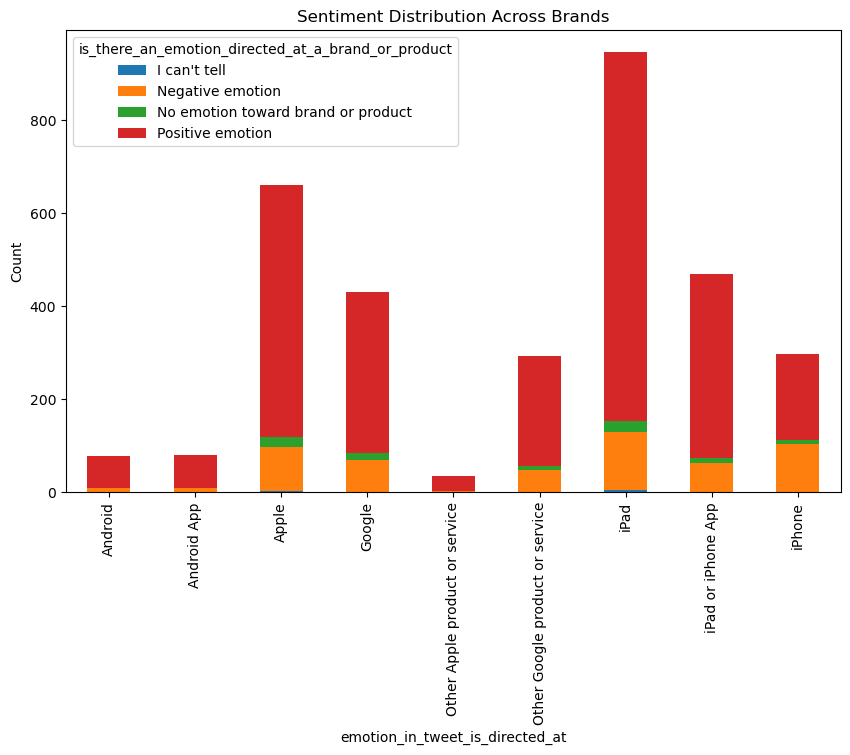

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sentiment counts by brand
brand_sentiment = df.groupby('emotion_in_tweet_is_directed_at')['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().unstack()

# Plot sentiment distribution
brand_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Brands')
plt.ylabel('Count')
plt.show()

## Key Findings from EDA
### Sentiment Distribution Across Brands
A bar chart was created to visualize sentiment across various brands and products mentioned in the tweets. Key takeaways:
- **Apple and iPad dominate positive sentiment**. These brands have the most favorable discussion in the dataset.
- **Negative sentiment is relatively low overall** compared to positive sentiment, indicating a possible bias in the dataset.
- **Google shows mixed sentiment**, with a notable proportion of negative tweets.

### Average Tweet Length
- Average tweet length: ~105 characters.
- Maximum tweet length: 178 characters.
- Insights:
  - Tweets are concise, suggesting minimal preprocessing for text length.

### Brand Mentions
- Most mentioned brands:
  - **iPad (946 mentions)**, followed by **Apple (661 mentions)**.
  - Other products like Google and iPhone also appear frequently.
  - Less frequent mentions: Android-related products.

## **Next Steps**
1. Begin data preprocessing:
   - Tokenization and removing stop words.
   - Text vectorization using TF-IDF or embeddings.
   - Addressing class imbalance using techniques like SMOTE or class weighting.
2. Establish baseline metrics:
   - Build a simple binary classifier (positive vs. negative sentiment).
   - Select **Recall** as the evaluation metric for negative sentiment to prioritize identifying customer complaints.
3. Iterate to include multiclass classification with "neutral" tweets.